In [1]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn(verbose=False)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import ourfunctions

In [2]:
X = pd.read_csv('data/Training-set-values.csv')
y = pd.read_csv('data/Training-set-labels.csv')

X['date_recorded'] = pd.to_datetime(X['date_recorded']).astype(np.int64)

### Models

In [3]:
log_reg_basic = {'classifier': LogisticRegression(C=1e6, n_jobs=3), 'preprocessor': None}
RandomFM_searched = {'classifier': RandomForestClassifier(n_jobs=3, **{'n_estimators': 186, 'min_samples_split': 2, 'max_depth': 49, 'criterion': 'entropy'}), 'preprocessor': None} # Included for RandomCVSearch later on

models = {'log_reg_basic': log_reg_basic, 'RandomFM_searched': RandomFM_searched}

### Modeler

In [4]:
model_run = ourfunctions.Modeler(models, X=X, y=y)

In [ ]:
model_run.train_all()
model_run.test_all()

/home/thedefect/anaconda3/envs/learn-env/lib/python3.8/site-packages/daal4py/sklearn/linear_model/logistic_path.py:453: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thedefect/anaconda3/envs/learn-env/lib/python3.8/site-packages/daal4py/sklearn/linear_model/logistic_path.py:453: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
Train Accuracy :  0.5424
Test Accuracy :  0.545
CV score (n=5) 0.5424
------------------------------------------------------------



/home/thedefect/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

             functional       0.54      1.00      0.71      8093
functional needs repair       0.00      0.00      0.00      1086
         non functional       0.00      0.00      0.00      5671

               accuracy                           0.54     14850
              macro avg       0.18      0.33      0.24     14850
           weighted avg       0.30      0.54      0.38     14850

------------------------------------------------------------




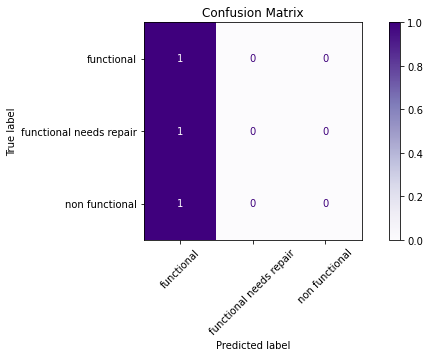

(<Figure size 720x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>)

In [5]:
model_run.model_evaluation('log_reg_basic')

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
Train Accuracy :  0.8971
Test Accuracy :  0.7975
CV score (n=5) 0.7936
------------------------------------------------------------

                         precision    recall  f1-score   support

             functional       0.76      0.95      0.84      8093
functional needs repair       0.78      0.16      0.26      1086
         non functional       0.88      0.70      0.78      5671

               accuracy                           0.80     14850
              macro avg       0.81      0.60      0.63     14850
           weighted avg       0.81      0.80      0.78     14850

------------------------------------------------------------




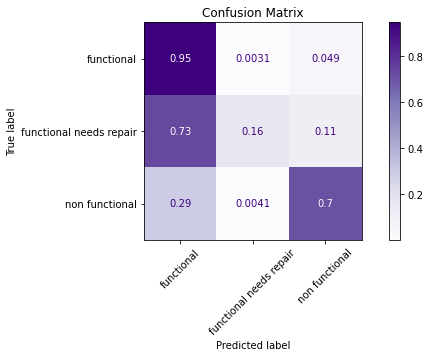

(<Figure size 720x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>)

In [6]:
model_run.model_evaluation('RandomFM_searched')